# ***QA-VAC NOTEBOOK - Region Selection Plots***

Author: Gabriel Luan Souza de Oliveira.

Last update: 18/01/2022.

## ***Imported Modules***

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pylab as plt 
import matplotlib.pyplot as mplt
import healpy as hp
from astropy.table import Table
from pylab import cm
from nice_plot import prep_plot as pp

## ***Loading Data***

In [3]:
table_det_frac = Table.read('detection_fraction.fits', memmap=True)

## ***Detection Fraction Maps (griz bands)***

TypeError: 'Text' object is not callable

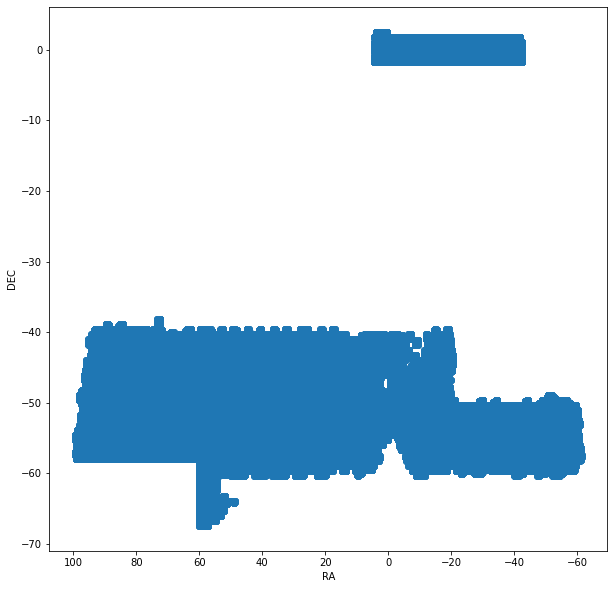

In [4]:
%%time
steradian_in_degrees = (180./np.pi)**2
sky_area = 4*np.pi*steradian_in_degrees #Area of an sphere measured in degrees^2
#https://www.mathsisfun.com/geometry/steradian.html

def plot_det_frac(nside, indexs, det_frac, verbose = False):
    ''' Plot a detection fraction map using healpix cartview.'''
    
    ###-------------------------------------------###
    #                Key informations               #
    ###-------------------------------------------###
    
    npixels = hp.nside2npix(nside) #Númeto de pixeis em um Healpix pixelization scheme => 12.0*(nside)**2.0
    area_of_each_pixel = sky_area/(npixels) #In degrees^2.
    pix_area_arcmin = 3600*area_of_each_pixel #Pixel area in (minutes of degree)².
    
    ###-------------------------------------------###
    #                MAP construction               #
    ###-------------------------------------------###
    
    det_frac_map = -np.inf*np.ones(npixels)
    
    for i in np.arange(0, len(indexs)):
        det_frac_map[indexs[i]] = det_frac[i]
    
    ra, dec = hp.pix2ang(nside,indexs, lonlat = True)
    
    ra[ra>180] -= 360
    
    ###-------------------------------------------###
    #                     Plot                      #
    ###-------------------------------------------###
    
    fig, ax = mplt.subplots(1, figsize = (10,10))
    ax.scatter(ra,dec)#c = det_frac, vmin = 0, vmax = 1, cmap = cm.gnuplot2_r)
    ax.invert_xaxis()
    ax.set_xlabel('RA')
    ax.set_ylabel('DEC')
    ax.title("Detection Fraction Map")
    mplt.show()
    
    '''
    kw = {
        'figsize': (18, 9),
        'nside': nside,
        'ralim': [-75, 120],
        'declim': [-75, 75],
        }
    
    plt.clf()
    fig = pp(*kw['figsize'])
    
    cmap = cm.gnuplot2_r
    cmap.set_under('.7')
    
    hp.mollview(det_frac_map, min = 0, max = 1, cmap = cmap, title = "Detection Fraction Map") #flip = 'geo'
    hp.graticule()
    
    hp_ax = fig.axes[-1]
    hp_ax.axis('on')
    hp_ax.grid(color='.5', lw=.5, zorder=0)
    
    hp_ax.set_xlabel('RA')
    hp_ax.set_ylabel('DEC')
    
    if verbose == True:
        print('Number of pixels:',npixels,
            '\nSky area:', sky_area,'degrees²',
            '\nArea of each pixel:', area_of_each_pixel, 'degrees²;', pix_area_arcmin,'min^2')'''

indexs = table_det_frac['pixel']
det_frac = table_det_frac['detfrac_i']

plot_det_frac(4096, indexs, det_frac,True)


 Visualização dos systematic maps
[ ] Detection Fraction (cada linha da tabela é um pixel, para griz bands).
[ ] N-images
 Visualização dos depth mapas (por bandas (griz), e por SN (5,10)).
Valores de magnitudes limites (seleciona o pixel com o problema, e não o objeto).
 Visualização da foreground objects mask (código bitmap, descrição no gold catalog)
Remove diversos objetos (estrelas, aglomerados globulares, galáxias anãs próximas) e a área próxima a eles.
 Visualização do footprint map (é 0 ou 1 )
É o mapa resultante a partir dos cortes feitos nos mapas anteriores.
 Cálculo da área efetiva (depende dos cortes feitos)
Cada pixel tem que ter area ponderada pelo detection fraction (somatório dos detection fractions).
Usando datashadder (ser interativo, inclusive os valores de densidade):

 Distribuição espacial dos objetos (mapa de densidades)
 Distribuição espacial do redshift médio/mediano
 Distribuição espacial do erro no redshift (erro médio)